Optimization in 1-D and N-D. Debugging Functions
====

## Unit 11, Lecture 1

*Numerical Methods and Statistics*

----

#### Prof. Andrew White,  April 19, 2020

Goals:
---

1. Learn the meaning of root-finding and minimization, the two types of optimization
2. Understand the iterative nature of these methods
3. Debug common problems when defining functions, which is essential for optimization
4. Be able to identify convex problems and understand their complexties
5. Learn the two standard methods for minimize and root-finding and how to call them in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Numerical Optimization - Root Finding
====

What is $x$ in

$$\cos (x) = x$$

To use a root-finding method, we must make our equation have one side be 0.

$$\cos (x) - x = 0$$

Newton's Method - For finding Roots
====

In [3]:
from scipy.optimize import newton

root =  newton(lambda x: np.cos(x) - x, x0=0)
print(root, np.cos(root) - root)

0.739085133215 0.0


$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

This method, like all this unit are *iterative*. This is modifiable by you, either through choosing tolerance, or maximum iterations. The functions have sensible defaults

In [4]:
root =  newton(lambda x: np.cos(x) - x, x0=0, tol=1e-3)
print(root, np.cos(root) - root)

0.739085112157 3.52429233574e-08


In [5]:
root =  newton(lambda x: np.cos(x) - x, x0=0, tol=1e-3, maxiter=5)
print(root, np.cos(root) - root)

0.739085112157 3.52429233574e-08


Newton's Method
====
*Use `root` instead, this is just for instructional purposes. `root` is better*

**Type:** Root Finding

**Discrete/Continuous:** Continuous

**Dimensions:** 1

**Derivative:** optional

**Non-Convex:** not recommended

**Python:** `newton`



Let's try to solve a more interesting equation with Newton's method!

$$ \int_0^x e^{-s^2}\,ds = \frac{1}{2}$$

Find $x$

In [6]:
#Note: this code is intentionally really bad
from scipy.integrate import quad
def equation(x):
    return quad(lambda s: np.exp(-s**2), 0, x)
root = newton(equation, x0=0)

TypeError: can't multiply sequence by non-int of type 'float'

Steps for Debugging Code
====

1. Correct any Python errors
2. Restart the Kernel
3. Correct any Python errors
4. Print to discover logical errors

Most Common Mistakes
----

1. Copy-Pasta leaving in old variables
2. Mixing Numpy arrays and `for` loops
3. Forgetting order of function args and return values

Review of Functions
====

For functions like `quad`, `newton`, and `minimize` the function should take in 1 argument and return 1 argument.

Correct Examples
====
$$x^2 - 3x + 2$$

In [7]:
def version_1(x):
    return x**2 - 3 *x + 2

version_2 = lambda x: x ** 2 - 3 *x + 2

np_version = np.vectorize(version_1)

print(version_1(3.))
print(version_2(3.))

some_threes = np.zeros(10)
some_threes[:] = 3.0 # -> Notice how we don't replace the numpy array with 3, but instead make all elements in it equal to three
#some_threes = 3 -> This would delete the numpy array and now some_threes would be a single 3

print(np_version(some_threes))

2.0
2.0
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


$$\int_{\pi}^x \sin^2(s)\,ds$$

In [8]:
from scipy.integrate import quad
import numpy as np
from math import pi

def integrate_sin2(x):
    ans, err = quad(lambda s: np.sin(s) ** 2, pi, x)
    return ans
    
print(integrate_sin2(2 * pi))

1.5707963267948966


2 Vectors, $\vec{x}$ and $\vec{y}$, where one component of $\vec{x}$ is changing and we want to know the distance between the two vectors.

In [9]:
from math import sqrt

def distance(x, y):
    sum_sq = np.sum((x - y)**2)
    return sqrt(sum_sq)

def my_distance(s):
    x = np.zeros(3)
    y = np.zeros(3)
    x[0] = 2.0
    x[1] = s
    x[2] = -3.5
    y[0] = 1.0
    y[1] = -3.0
    y[2] = 0.0
    return distance(x, y)

print(my_distance(1))

5.408326913195984


Incorrect Examples
----

### No Return Value

In [10]:
def version_1(x):
    x**2 - 3 *x + 2

print(version_1(3.))

None


### Bad Return Value

In [11]:
def integrate_sin2(x):
    return quad(lambda s: np.sin(s) ** 2, pi, x)

print(integrate_sin2(2 * pi))

(1.5707963267948966, 1.743934249004316e-14)


### Too many arguments

In [12]:
def distance(x, y):
    sum_sq = np.sum((x - y)**2)
    return sqrt(sum_sq)

print(distance(1))

TypeError: distance() missing 1 required positional argument: 'y'

Let's return to our example from above:

$$ \int_0^x e^{-s^2}\,ds = \frac{1}{2}$$

Find $x$

In [13]:
#note still wrong
def equation(x):
    ans, err = quad(lambda s: np.exp(-s**2), 0, x)
    return ans
root = newton(lambda x: equation(x), x0=0)
print(root)

-4.5175088239502025e-29


In [14]:
equation(root)

-4.5175088239502025e-29

We forgot to rearrange the equation to be equal to $0$

In [15]:
root = newton(lambda x: equation(x) - 0.5, x0=0)
print(root, equation(root))

0.5510394276090266 0.49999999999999994


Scope
----

Scope means the set of variables and functions which are defined and accessible in your code

In [16]:
x = 4
y = 2

#Right now, there is x,y and all other functions/variables defined or imported above in the scope

Scopes nest
----

In [17]:
x = 4
y = 2
#Here, I have x and y in scope
def scope_example():
    z = 2
    #Here, I have x,y and z in scope
    
#Here I again have only x and y in scope

In [18]:
x = 4 
y = 2
print(y,"Before function")
def scope_example():
    y = 25 #This is a new version of y that exists only in this scope
    print(y, "Inside function")
scope_example()
print(y, "After Function")

2 Before function
25 Inside function
2 After Function


In [19]:
x = 4 
y = [2]
print(y,"Before function")
def scope_example():
    y[0] = 25 #Here I'm not creating a y, but modifying y
    print(y, "Inside function")
scope_example()
print(y, "After Function")

[2] Before function
[25] Inside function
[25] After Function


Things to remember about scope:

1. Scopes nest, so that you can access things above your scope
2. You can modify variables from any scope you can see, but ones you create disappear outside of the scope

Returning to Optimization
====

Applications of Optimization
===

1. Solving non-linear equations
2. Solving systems of equations
3. Optimizing equations with or without constraints
4. Fitting models to data

Choosing which method to use
----

There are five things to consider when doing optimization:

1. Is it 1 or N dimensions?
2. Are you minimizing or root-finding?
3. Are there constraints?
4. Are there bounds?
5. Is it convex or non-convex?

Identifying Convexity
====

If a problem has more than one minimum (derivative is 0), then the problem is non-convex. **The opposite of convex is non-convex. A concave function can be made convex with a negative sign. A non-convex function cannot be made convex**.

Knowing about convexity can come from:

* Plots
* Running convex optimization in two starting positions and getting different minimums
* Knowing something specific about the problem

Consider a function with two minimums:

In [20]:
def two_well(x):
    if x < 0.125:
        return (x + 2) ** 2
    if x >= 0.125:
        return (x - 2) ** 2 + 1
    
np_two_well = np.frompyfunc(two_well, 1, 1)

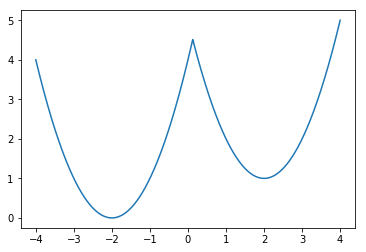

In [21]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, np_two_well(x))
plt.show()

BFGS Optimization - Minimization
====
Broyden–Fletcher–Goldfarb–Shanno

BFGS
====

**Type:** Minimization

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Non-Convex:** not recommended

**Python:** `minimize` if no constraints or bounds are given

Nomenclature
----

In optimization, you have a function called the **objective function**. That's what you're minimizing. It always returns a single value. It is sometimes called the **fit**, the **error**, the **residual**, or the **penalty**.

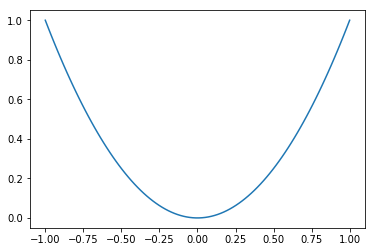

In [22]:
def obj(x):
    return x**2

x = np.linspace(-1,1,100)
plt.plot(x, obj(x))
plt.show()

In [23]:
from scipy.optimize import minimize

minimize(obj, x0=3)

      fun: 2.5388964258140254e-16
 hess_inv: array([[ 0.5]])
      jac: array([  4.67689909e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([  1.59339149e-08])

Minimize Return value
----
         fun: The value of the function at the minimum
    hess_inv: The inverse of the the Hessian
         jac: The value of the Jacobian
     message: A string describing what happened
        nfev: Number of function evaluations
         nit: Number of iterations of the x point
        njev: Number of times it computed the Jacobian
      status: The single digit message (0 = success, != 0 some error)
     success: Boolean indicating success
           x: The minimum x

Objective Functions
===

Be careful that your objective function is *convex* and it's maximum isn't at $\infty$ or $-\infty$. 

A good objective function
----

Minimize the following:

$$f(x) = \frac{(x - 4)^2}{2} + \frac{(x - 2)^2}{4}$$ 

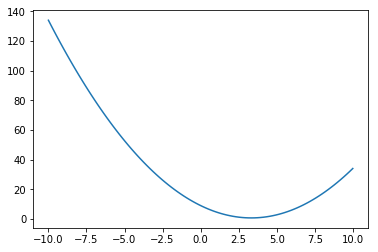

In [25]:
def f(x):
    return ((x-4)**2)/2+((x-2)**2)/4
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))
plt.show()

In [48]:
result = minimize(f, x0=0)
print(f'the minimum value occurs at {result.x} and is {result.fun}')

the minimum value occurs at [ 3.33333336] and is 0.6666666666666674


A bad objective function
----

Minimize the following:

$$
f(x) = \frac{(x - 4)} { 2 }
$$

The minimum is at $-\infty$!

In [47]:
result = minimize(lambda x: (x - 4) / 2, x0=0)
print(f'the minimum value occurs at {result.x} and is {result.fun}')

the minimum value occurs at [ -1.78956970e+08] and is -89478487.25


A good objective function but bad `x0`
---

Minimize the following function

$$4 \left[ r^{-12} - r^{-6}\right]$$

In [49]:
result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=0)
print(f'the minimum is at {result.x}')

the minimum is at [ 0.]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


*Our initial value was not in the domain!*

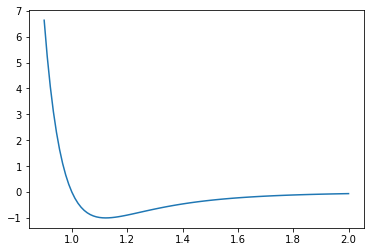

In [40]:
r = np.linspace(0.9, 2, 100)
y = 4 * (r**(-12) - r**(-6))
plt.plot(r, y)
plt.show()

In [50]:
result = minimize(lambda r: 4 * (r**(-12) - r**(-6)), x0=1)
print(f'the minimum is at {result.x} and its value is {result.fun}')

the minimum is at [ 1.12246208] and its value is -0.9999999999999768


Maximizing
---

In order to maximzie a function, just add a minus sign

Maximize the following function:

$$
-\left[x - \cos(x)\right]^2
$$

In [54]:
#place - sign to make it a maxmimization problem
result = minimize(lambda x: (x - np.cos(x))**2, x0=1)
print(f'the maximum is at {maximum}')

the maximum is at [-0.7390852]


Multiple Dimensions
----

Just indicate multiple dimensions by using a multidimensional `x0`. Note that your $x$ becomes a vector!

Minimize the following:

$$
f(x) = \frac{(x - 4)^2} { 2 } + \frac{(y + 3)^2} { 5 }
$$

In [57]:
result = minimize(lambda x: (x[0] - 4)**2 / 2 + (x[1] + 3)**2 / 5, x0=[0,0])
print(f'maximum occurs when x = {result.x[0]} and y = {result.x[1]}')

maximum occurs when x = 3.999999680451366 and y = -3.0000083683518133


Identifying Convexity for Minimization - Example
----

The best ways to identify convexity are:

* plot it
* try optimizing in multiple starting positions

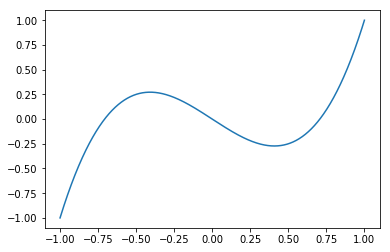

In [58]:
x = np.linspace(-1, 1, 1000)
plt.plot(x,  2 * x ** 3 - 0 * x **2  - x)
plt.show()

In [59]:
from scipy.optimize import minimize
minimize(lambda x:  2 * x ** 3 - 0 * x **2  - x, x0=0.05)

      fun: -0.27216552697590846
 hess_inv: array([[ 0.20398928]])
      jac: array([ -1.11758709e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.40824828])

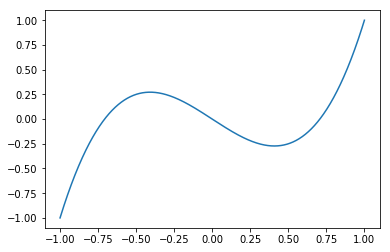

In [60]:
x = np.linspace(-1, 1, 1000)
plt.plot(x,  2 * x ** 3 - 0 * x **2  - x)
plt.show()

In [61]:
from scipy.optimize import minimize
minimize(lambda x:  2 * x ** 3 - 0 * x **2  - x, x0=-0.5)

      fun: -1.146240476075504e+25
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 1
     njev: 16
   status: 0
  success: True
        x: array([ -1.78956955e+08])

Powell hybrid method
====

**Type:** Root finding

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Non-Convex:** not recommended

**Python:** `root` unless `method` argument specifies a different method

1D Example
---

This is exactly like `newton` from above. Solve this equation:

$$
\cos x + \sin x = x
$$

In [65]:
from scipy.optimize import root
#rearranged equation so all terms on one side
result = root(lambda x: np.cos(x) + np.sin(x) - x, x0=1)
print(result)

    fjac: array([[-1.]])
     fun: array([  2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([ -2.42716958e-12])
       r: array([ 1.64467312])
  status: 1
 success: True
       x: array([ 1.25872818])


The result type is like what we saw for minimize. Similar terms are here, including the root and the value of the function at the root. Notice it's not exactly $0$ at the root.

In [66]:
x = result.x 
print(np.cos(x) + np.sin(x) - x)

[  2.22044605e-16]


Solve the following system of equations:
$$ 3 x^2 - 2 y = 4$$
$$ x - 4 y ^ 2 = -2$$

In [72]:
def sys(v):
    #I'm using v here to distinguish from the x in the equations
    #extract x and y
    x = v[0]
    y = v[1]
    #compute equations
    eq1 = 3 * x ** 2 - 2 * y - 4
    eq2 = x - 4 * y**2 + 2
    #pack into list
    sys_eq = [eq1, eq2]
    return sys_eq
root(sys, x0=[1,1])

    fjac: array([[-0.99129609, -0.13165126],
       [ 0.13165126, -0.99129609]])
     fun: array([  2.87769808e-13,   3.16324744e-12])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  4.70588464e-09,   2.08104163e-08])
       r: array([-8.45721872,  2.95677276,  7.06016501])
  status: 1
 success: True
       x: array([ 1.39555277,  0.92135129])

So the answer is $x = 1.40,\: y = 0.921$

You should not ignore the information in the output of root. Imagine this small modification:

$$ 3 x^2 - 2 y^2 = 4$$
$$ x^3 - 4 y = -2$$

In [74]:
def sys2(v):
    #I'm using v here to distinguish from the x in the equations
    #extract x and y
    x = v[0]
    y = v[1]
    #compute equations
    eq1 = 3 * x ** 2 - 2 * y**2 - 4
    eq2 = x**3 - 4 * y + 2
    #pack into list
    sys_eq = [eq1, eq2]
    return sys_eq
root(sys2, x0=[1,1])

    fjac: array([[-0.79311064, -0.60907759],
       [ 0.60907759, -0.79311064]])
     fun: array([-0.31652211,  0.4128055 ])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 30
     qtf: array([ -3.93523929e-04,  -5.20186955e-01])
       r: array([ -1.16194697e+01,   6.56882367e+00,  -1.16411656e-03])
  status: 5
 success: False
       x: array([ 1.53592084,  1.30262823])

If you did not read the message or status, you might believe the method succeeded. 

More compact version:

In [77]:
root(lambda x: [3 * x[0] ** 2 - 2 * x[1] - 4, x[0] - 4 * x[1] ** 2 + 2], x0=[1,1])

    fjac: array([[-0.99129609, -0.13165126],
       [ 0.13165126, -0.99129609]])
     fun: array([  2.87769808e-13,   3.16324744e-12])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  4.70588464e-09,   2.08104163e-08])
       r: array([-8.45721872,  2.95677276,  7.06016501])
  status: 1
 success: True
       x: array([ 1.39555277,  0.92135129])

Importance of starting position
----

By the way, there are two roots to this function!

In [78]:
root(lambda x: [3 * x[0] ** 2 - 2 * x[1] - 4, x[0] - 4 * x[1] ** 2 + 2], x0=[0, 0])

    fjac: array([[ 0.98296038,  0.18381755],
       [-0.18381755,  0.98296038]])
     fun: array([  2.66453526e-15,  -4.44089210e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([  2.87224221e-12,  -7.25968027e-13])
       r: array([ 5.41242052, -0.44135572,  6.9600742 ])
  status: 1
 success: True
       x: array([ 0.87635927, -0.84799164])